## <center>AISC2007 - Deep Learning</center>

## <center>Case Study 1 - Machine Learning</center>

### Background and Context
You are a Data Scientist for a tourism company named "Tour Guide". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Tour Guide" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.


### Objective
* To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary
**Customer details:**
1.	CustomerID: Unique customer ID
2.	ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3.	Age: Age of customer
4.	TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5.	CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6.	Occupation: Occupation of customer
7.	Gender: Gender of customer
8.	NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9.	PreferredPropertyStar: Preferred hotel property rating by customer
10.	MaritalStatus: Marital status of customer
11.	NumberOfTrips: Average number of trips in a year by customer
12.	Passport: The customer has a passport or not (0: No, 1: Yes)
13.	OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14.	NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15.	Designation: Designation of the customer in the current organization
16.	MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:**
1.	PitchSatisfactionScore: Sales pitch satisfaction score
2.	ProductPitched: Product pitched by the salesperson
3.	NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4.	DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import libraries

In [1]:
# Libraries to read and manipulate data
import numpy as np
import pandas as pd

# Libraries to visualize data
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import NearMiss

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, plot_confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Set color pallete
sns.set_theme()

### Reading the data

In [2]:
tourism = pd.read_excel("Tourism.xlsx", sheet_name = "Tourism")

In [3]:
tourism.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
print("The dataset has {} rows and {} columns.".format(tourism.shape[0], tourism.shape[1]))

The dataset has 4888 rows and 20 columns.


### Understanding the dataset

In [5]:
# Creating copy of the dataset
data = tourism.copy()

In [6]:
# View first 5 rows of the dataset
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
# View last 5 rows of the dataset
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [8]:
# Details of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Observations

* There are total of 4888 rows in the dataset and 20 columns.
* From the data above we can see that there are some non-null rows in the dataset.
* The data also helps in understanding the data type of each of the column.

In [9]:
# Check for duplicate values
data.duplicated().sum()

0

The dataset does not contain any duplicate values

In [10]:
# Percent of missing values
data.isnull().sum() / data.isnull().count() * 100

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

Insights obtained from above output:
* The `Age`, `DurationOfPitch` and `MonthlyIncome` columns have the highest amount of missing values.
* The column `TypeofContact` has 0.5 % of missing values.
* The column `NumberOfFollowups` has 0.9 % of missing values.
* The column `PreferredPropertyStar` has 0.5 % of missing values.
* The column `NumberOfTrips` has 2.8 % of missing values.
* The column `NumberOfChildrenVisiting` has 1.3 % of missing values.

In [11]:
# Checking statistical summary
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


**Observations**
* The column `DurationOfPitch` has a maximum values of 127 which is way far from the 75th percentile. Thus, there is a possibility of having an outlier at the right end.
* The column `NumberOfTrips` also has a large difference between the 75th percentile and maximum value. We will have to look into it further to understand it better.
* For the `MonthlyIncome` column there is a huge difference between the minimum value and the 25th percentile as well as maximum value and the 75th percentile. There is a possibility of outliers on both the ends and will need to look into it futher.

### Data Preprocessing

*   We can drop the column `CustomerID` as it contains unique values and adds no value to the model



In [12]:
# Dropping column - CUstomerID
data.drop(columns=["CustomerID"], inplace = True)

In [13]:
# The function helps to draw countplots
def count_Plot(data, features, rotate_xticks = False):
  n = data[features].nunique()
  g = sns.countplot(data=data, x = features)
  if rotate_xticks:
    plt.xticks(rotation = 90)

  # Displaying the counts
  for p in g.patches:
    lable = p.get_height()
    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    g.annotate(lable, 
               (x,y), 
               ha = 'center', 
               va = 'center', 
               size = 12,
               xytext=(0, 5),
               textcoords="offset points")

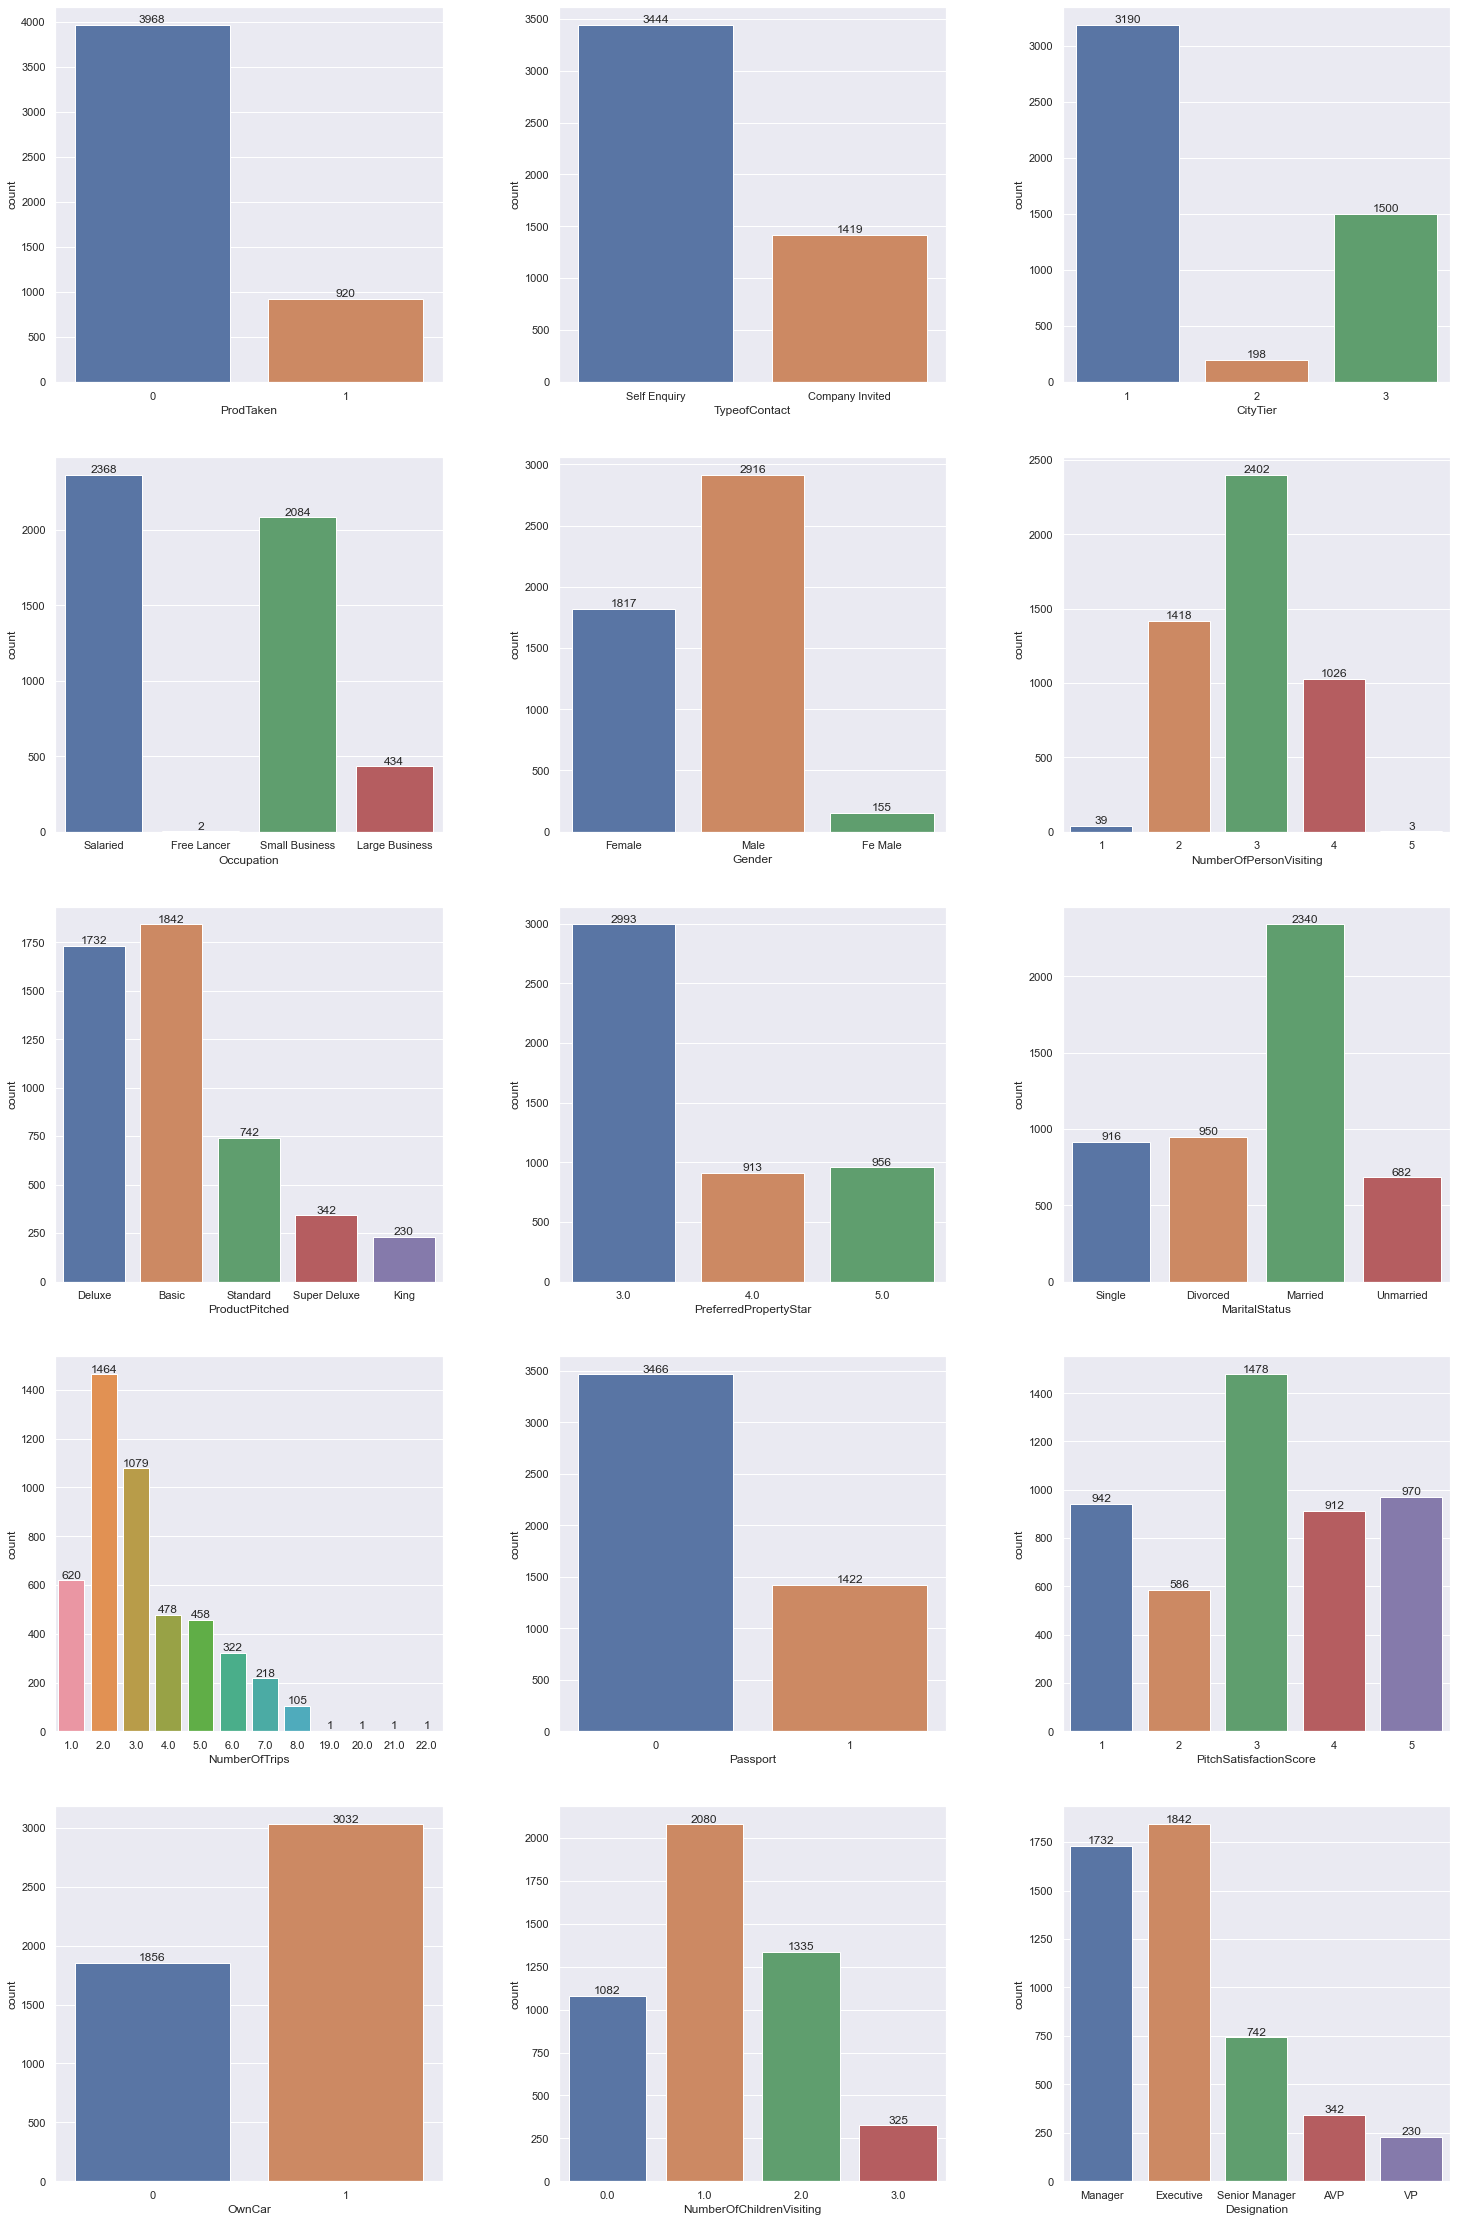

In [14]:
# List of categorical columns
cat_cols = ["ProdTaken", 
            "TypeofContact", 
            "CityTier", "Occupation", "Gender", 
            "NumberOfPersonVisiting", "ProductPitched", "PreferredPropertyStar", 
            "MaritalStatus", "NumberOfTrips", "Passport", "PitchSatisfactionScore", 
            "OwnCar", "NumberOfChildrenVisiting", "Designation"]

fig, g = plt.subplots(nrows=5, ncols=3, figsize=(25, 40))
ind = 1
for feature in cat_cols:
  plt.subplot(5,3,ind)
  count_Plot(data, feature)
  ind += 1

fig.subplots_adjust(hspace=0.2, wspace=.3) 
plt.show()

**Observations**


* Looking at `ProdTaken` we can see that our data is highly imbalance as only 18% of the people have taken the product.
* In the graph for `TypeofContact` we can see that the number of people self enquiring is 3444 which is more as compared to those who are being contacted by the agency.
* In `CityTier`, the number of people are more for tier 3 followed by tier 1 and then tier 2.
* In case of `Occupation` the number of Freelancer enquiring for the package are only 2 whereas the Salaried employees are more interested in knowing about the pacakages.
* For `Gender` we observe that it has values like Fe Male and Female which are same. We will replace Fe Male with Female.
* For `NumberOfPersonVisiting`, usually people prefer to travel in a group of 3 followed by a group of 2. Only 39 of observations are interested in a solo trip and 3 of them are looking for pacakges that can accomodate five members.
* Most of the enquires are for the 'Basic' and 'Deluxe' packages and people prefer a 3 star property.
* In case of `MaritalStatus`, there are 2340 enquires from married people, appproximately equal number of enquires from Single and divorced people and only 682 enquires from Unmarried people.
* The number of people having a passport is only 1422 which is less than the people not having a passport.
* On a similar basis, the number of people owning a car is more that those not having a car.
* In case of `Designation`, the company receive a kot of enquires from Managers and Executives.

In [15]:
# Replacing "Fe Male" to "Female"
data["Gender"].replace({"Fe Male": "Female"}, inplace = True)

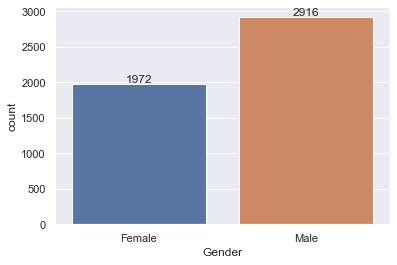

In [16]:
count_Plot(data, "Gender")

In [17]:
# The function helps to plot stacked barchart and provide caomparison with other variables
def comparison_Barplot(data, predictor, target):
  count = data[predictor].nunique()

  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
      by=sorter, ascending=False
  )
  print(tab1)
  print("-" * 120)
  tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
      by=sorter, ascending=False
  )
  tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
  plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
  plt.show()
 

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


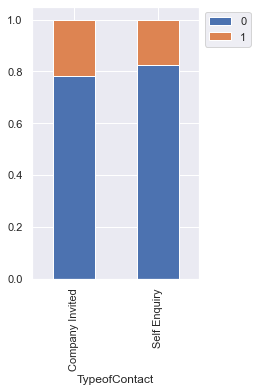

In [18]:
# Compare TypeofContact with ProdTaken
comparison_Barplot(data, "TypeofContact","ProdTaken")

* In case of Company Invited there is ~22% chances of people taking the package whereas for Self enquiry there is only 17% chances.

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


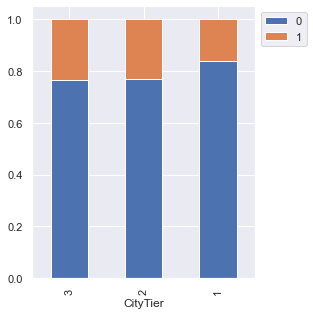

In [19]:
# Compare CityTier with ProdTaken
comparison_Barplot(data, "CityTier","ProdTaken")

* If a person is from tier 2 or tier 3 there is 23% probability that he/she will purchase the package, while if a person is from tier 1 then there is just 16% chance.

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


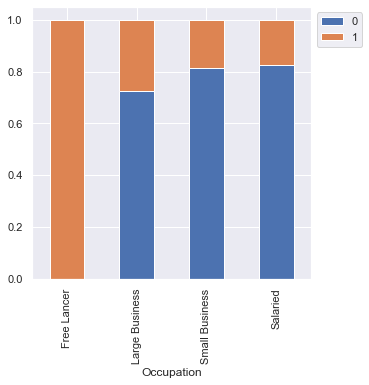

In [20]:
# Compare Occupation with ProdTaken
comparison_Barplot(data, "Occupation","ProdTaken")

* We can see that for Free Lancer all the people who enquired have bought the package, but, it is difficult to commit on that as there are only 2 observations available for Free Lancer.
* There are 27% chance that a large business owner may buy the package and ~ 17-18 percent chance that a Salaried employee or Small business owner would buy the package.

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


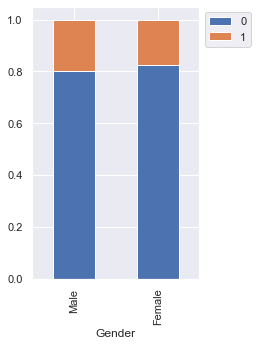

In [21]:
# Compare Gender with ProdTaken
comparison_Barplot(data, "Gender","ProdTaken")

* In case of Gender the chances of buying the package is approximately same.

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


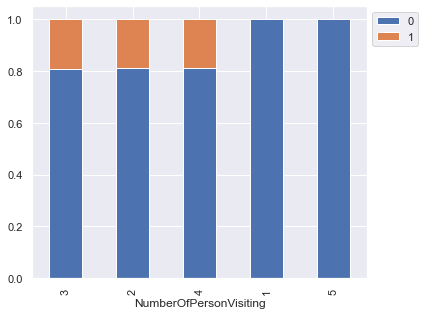

In [22]:
# Compare NumberOfPersonVisiting with ProdTaken
comparison_Barplot(data, "NumberOfPersonVisiting","ProdTaken")

* In case of number of person visiting people buying the package travel in a group of 2, 3 or 4

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


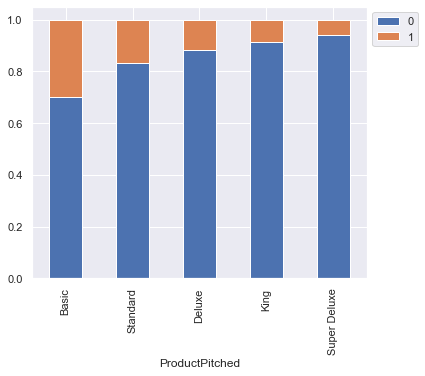

In [23]:
# Compare ProductPitched with ProdTaken
comparison_Barplot(data, "ProductPitched","ProdTaken")

* We can see above that there are 30% chances that people enquiring about Basic product would buy the product, followed by other Standard, Deluxe, King and Super Deluxe package.

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


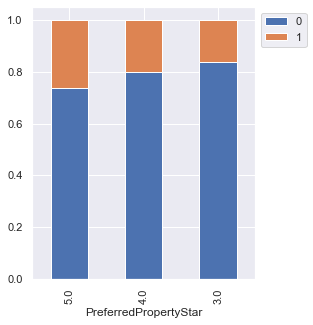

In [24]:
# Compare PreferredPropertyStar with ProdTaken
comparison_Barplot(data, "PreferredPropertyStar","ProdTaken")

* People enquiring about 5 star accomodation have higher possibilities of buying the package.
* For all the customers enquiring about 4 star and 3 star lodgings, the chances of them purchasing the package are roughly the same.

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


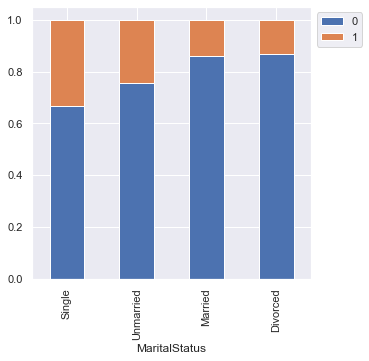

In [25]:
# Compare MaritalStatus with ProdTaken
comparison_Barplot(data, "MaritalStatus","ProdTaken")

* There are high chances that a Single person would buy the product as compared to the other categories.

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


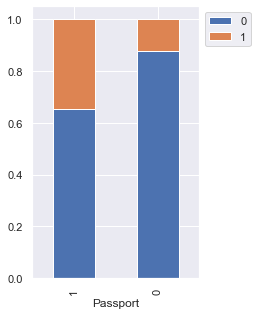

In [26]:
# Compare Passport with ProdTaken
comparison_Barplot(data, "Passport","ProdTaken")

* People with Passport are more likely to buy pacakges as compared to others.

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


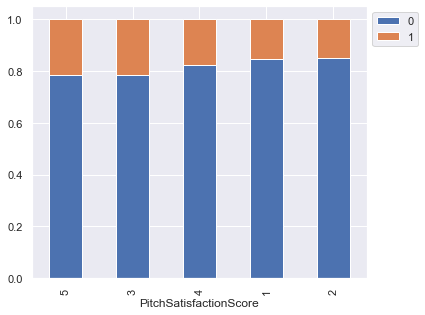

In [27]:
# Compare PitchSatisfactionScore with ProdTaken
comparison_Barplot(data, "PitchSatisfactionScore","ProdTaken")

* The satisfaction score provided by the curtomers does not provide much of an insight when it comes to buying the package.

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


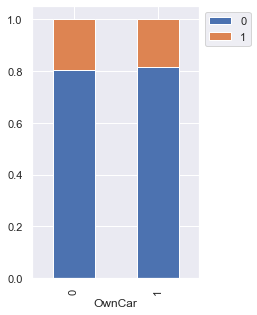

In [28]:
# Compare OwnCar with ProdTaken
comparison_Barplot(data, "OwnCar","ProdTaken")

* There is no much difference whether a customer owns a car or not.

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3909  913  4822
1.0                       1688  392  2080
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


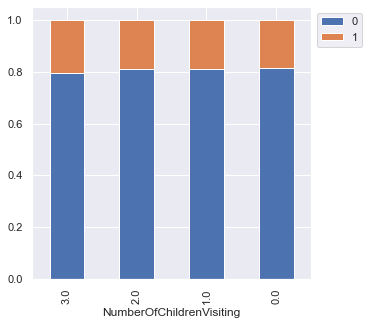

In [29]:
# Compare NumberOfChildrenVisiting with ProdTaken
comparison_Barplot(data, "NumberOfChildrenVisiting","ProdTaken")

* When it comes to number of children visiting the contribution is the same so it will not make any diffierence.

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


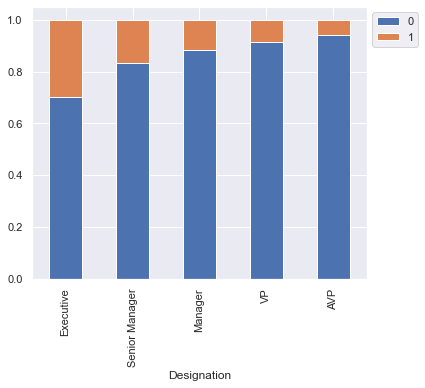

In [30]:
# Compare Designation with ProdTaken
comparison_Barplot(data, "Designation","ProdTaken")

* As seen in the graph above, there is 30 % chance that an Executive will buy the package.
* As compared to Executives, people at other designations has a lesser probability to buy the package.

In [31]:
# The function plot a boxplot and a histogram to better understand the distribution of data
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # creating the 2 subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    
    # Plotting histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ) 
    
    # Adding mean to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    
    # Adding median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

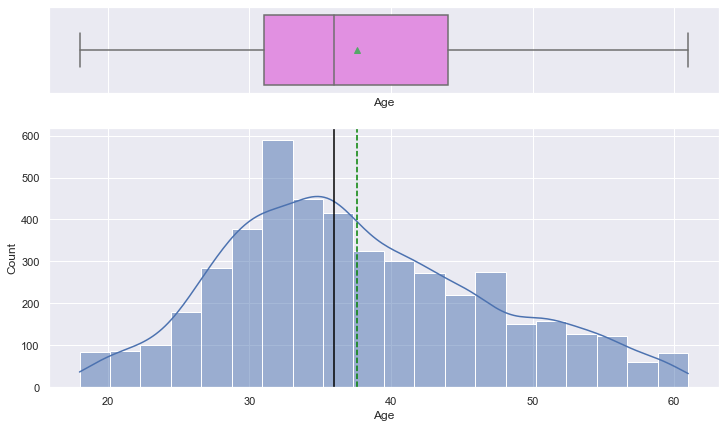

In [32]:
# Plotting boxplot and histogram for Age
histogram_boxplot(data, "Age", bins = 20, kde = True)

* The data for `Age` is normally distributed and does not contain outlier.
* The mean and median is also approximately equal.
* The age group of people enquiring about the packages lies highly between 28 to 42.
* Since the median is at 36, more than 50% customers enquiring are below the age of 36.

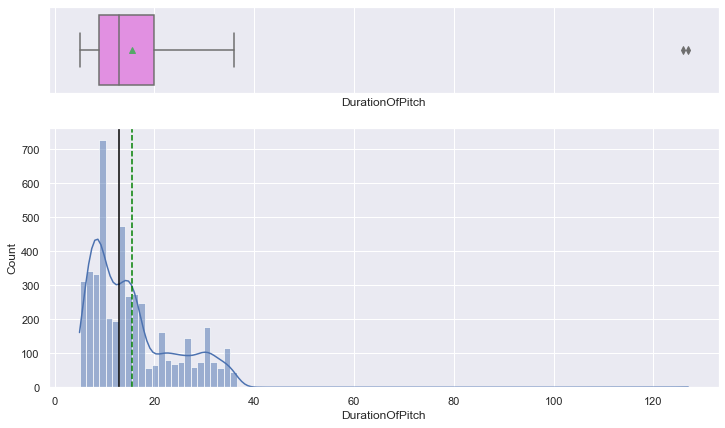

In [33]:
# Plotting boxplot and histogram for DurationOfPitch
histogram_boxplot(data, "DurationOfPitch", kde = True)

* The data contains outliers.
* There are might be possibilities that the pitch might have gone for a long time.

In [34]:
# Looking at the ouliers
data[data["DurationOfPitch"]>40]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


* Both the observations haven't taken the package even after listening the pitch for over 120.
* For the first record the age field is also missing and also the age for the second record is more than 50.
* Thus, we can drop these two records as they might not add any value.

In [35]:
# Dropping the records above 40
data.drop(data[data["DurationOfPitch"]>40].index, inplace = True)
data.shape

(4886, 19)

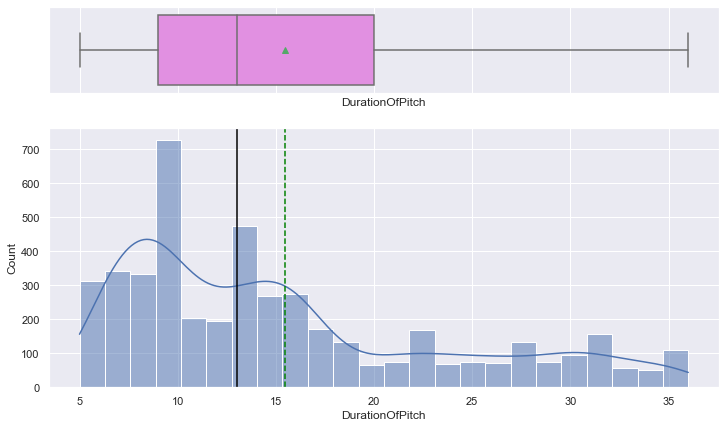

In [36]:
# Plotting boxplot and histogram for DurationOfPitch again to check the distribution
histogram_boxplot(data, "DurationOfPitch", kde = True)

* Now, we can see that there are no outliers in the data.
* The data is little skewed towards the right but it is not highly skewed.

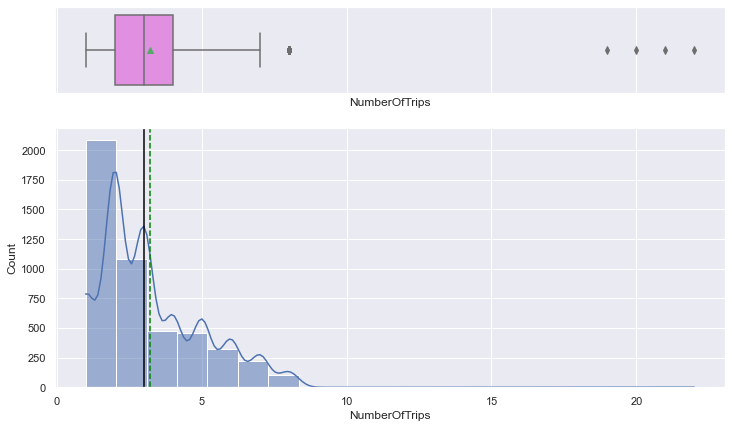

In [37]:
# Plotting boxplot and histogram for NumberOfTrips
histogram_boxplot(data, "NumberOfTrips", kde = True, bins = 20)

* The Number if Trips column is highly right skewed.
* We can observe some outliers in the data as there are some people taking more than 10 trips a year.
* This data cannot be considered as error because there might be a possibility that people have travelled a lot for work.
* As the median and mean values are almost equal and the median lies at 3.2 we can say that 50% of the people travel atleast 3 times a year.

In [38]:
# Checking the values that are above 10
data[data["NumberOfTrips"]>10]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0


In [39]:
# Capping the values to maximum in order to retain the records
data["NumberOfTrips"].clip(upper = 10, inplace=True)

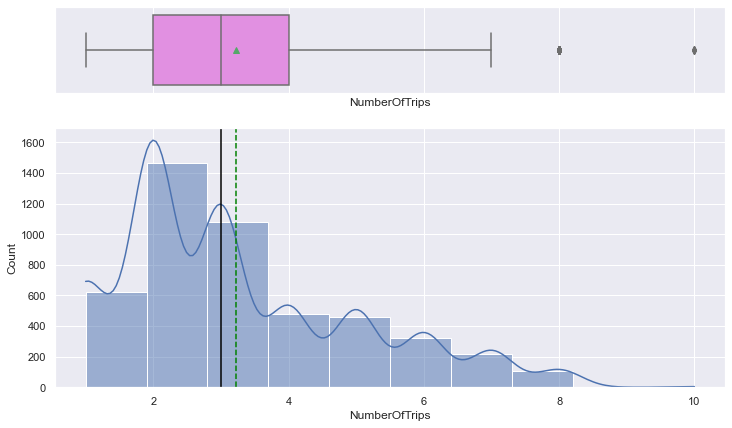

In [40]:
# Plotting boxplot and histogram for NumberOfTrips again
histogram_boxplot(data, "NumberOfTrips", kde = True, bins = 10)

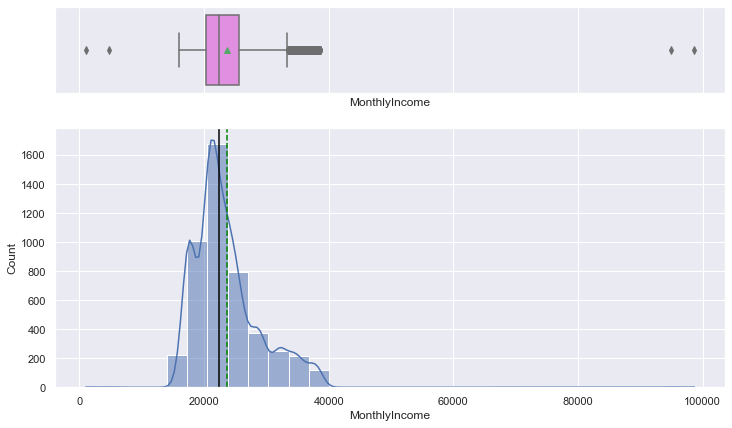

In [41]:
# Plotting boxplot and histogram for MonthlyIncome
histogram_boxplot(data, "MonthlyIncome", kde = True, bins = 30)

* We can see outliers at both the ends.
* The Monthly income data is highly right skewed as it has some large values towards the right end.
* We need to take a look at the outliers and handle it accordingly.

In [42]:
# Checking the monthly income values that are below 10,000
data[data['MonthlyIncome']<10000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


* Both these observations have not taken the product and also they both have a large business.
* It is impossible for a Manager of a large business to earn such a low salary. Thus, we can drop these values.

In [43]:
# Dropping the values
data.drop(data[data["MonthlyIncome"]<10000].index,inplace=True)
data.shape

(4884, 19)

In [44]:
# Checking the monthly income value that is greater 40,000
data[data['MonthlyIncome']>40000]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


* The possibility of a salaried employee having such a high salaray is very rare.
* Also, the first record has some null value and they havn't even bought the package.
* Thus, we can drop both of these values.

In [45]:
# Dropping the values
data.drop(data[data["MonthlyIncome"]>40000].index,inplace=True)
data.shape

(4882, 19)

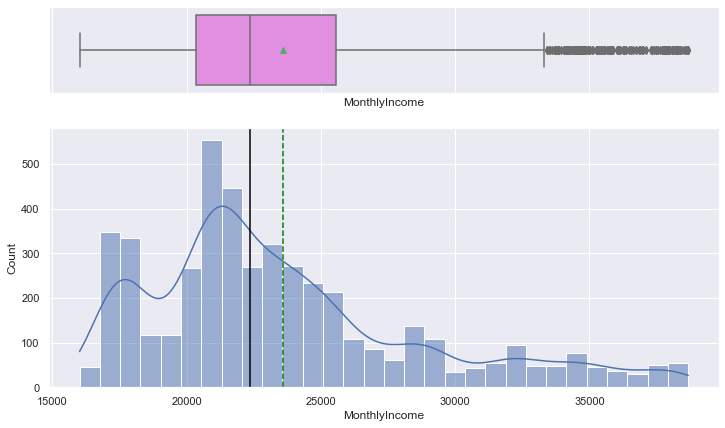

In [46]:
# Plotting boxplot and histogram for MonthlyIncome again
histogram_boxplot(data, "MonthlyIncome", kde = True, bins = 30)

* The data is slightly right skewed
* The median lies ar around 23,000 whcih indicates that 50% of the customers have a monthly income of less than 23,000

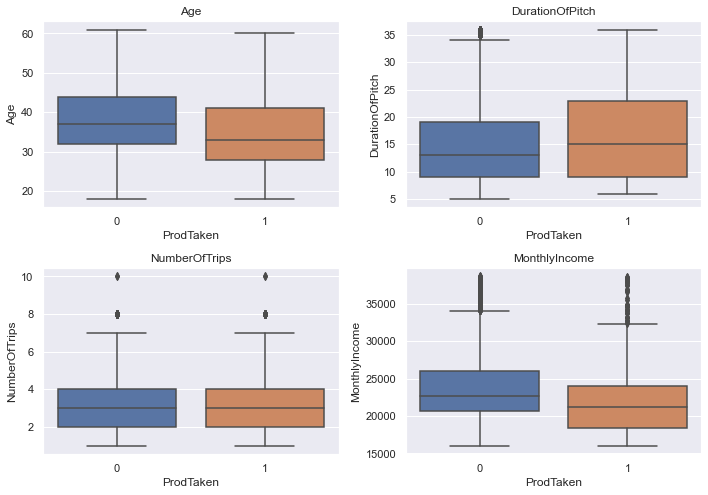

In [47]:
# Boxplot of some features with ProdTaken
cols = data[["Age", "DurationOfPitch", "NumberOfTrips", "MonthlyIncome"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["ProdTaken"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

* According to the boxplot for 'Age', people between the ages of 30 and 40 are more likely to take the package. That is to say, the younger the person, the more likely he or she will accept the package.
* Similarly, People with monthy income ranging from somewhere around 18,000 to 23,000 are more likely to purchace the package.
* When it comes to pitch duration, the longer the pitch, the more probable someone will buy the package.

In [49]:
# Creating copy of data
data_1 = data.copy()

In [50]:
# Performing label encoding to convert categorical data into numerical data
# Initializing the encoder
encoder = LabelEncoder()

# Transforming the categorical values
data_1["TypeofContact"] = encoder.fit_transform(data_1['TypeofContact'],)
data_1["Occupation"] = encoder.fit_transform(data_1['Occupation'])
data_1["Gender"] = encoder.fit_transform(data_1['Gender'])
data_1["ProductPitched"] = encoder.fit_transform(data_1['ProductPitched'])
data_1["MaritalStatus"] = encoder.fit_transform(data_1["MaritalStatus"])
data_1["Designation"] = encoder.fit_transform(data_1["Designation"])

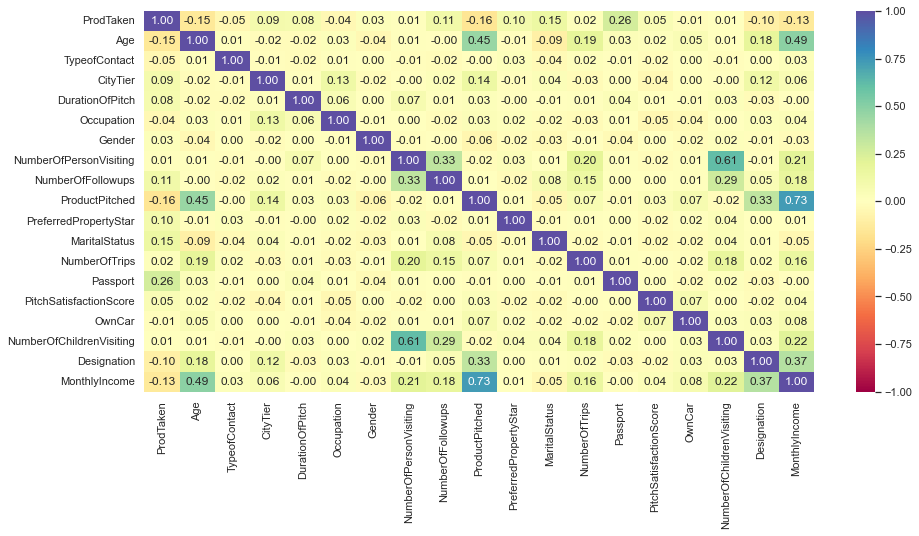

In [51]:
# Displaying the correlation between features
plt.figure(figsize=(15, 7))
sns.heatmap(data_1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* We can see that our colums ProductPitched and MonthlyIncome are highly correlated.
* Followed by these two columns we also find the columns NumberOfChildrenVisiting and NumberOfPersonVisiting are also coorrelated. Thus, we reatined only one column.


### Splitting data into dependent and independent sets

In [52]:
cols = ["ProdTaken","NumberOfChildrenVisiting"]
X = data_1.drop(columns=cols, axis=1)

In [53]:
Y = data_1["ProdTaken"]

In [54]:
X["TypeofContact"].value_counts()

1    3440
0    1417
2      25
Name: TypeofContact, dtype: int64

In [55]:
X["TypeofContact"].replace({2:np.nan}, inplace = True)

In [56]:
# Imputing null values using mode imputer.
imputer = SimpleImputer(strategy = "most_frequent")
impute = imputer.fit(X[["TypeofContact"]])
X["TypeofContact"] = impute.transform(X[["TypeofContact"]])

In [57]:
X['TypeofContact'].value_counts()

1.0    3465
0.0    1417
Name: TypeofContact, dtype: int64

In [58]:
# Imputing null values using median imputer.
imputer = SimpleImputer(strategy = "median")
impute = imputer.fit(X)
X = impute.transform(X)

In [59]:
# Splitting into temp and test sets.
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, random_state=1, test_size=0.2)

# Splitting temp data into train and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, random_state=1, test_size=0.2)

In [60]:
y_val.value_counts()

0    624
1    157
Name: ProdTaken, dtype: int64

## Building the model

The goal variable in our model is ProdTaken, which includes 1 or 0 as data. We utilise classification algorithms to develop the model since we need to predict if the consumer will buy the newly added package or not. Some of the classification algorithms used are:
1. Logistic
2. Bagging
3. Random Forest
4. Gradient Boosting 
5. Adaboost
6. XGBoost
7. Decision Tree

In [61]:
# Helper function to compare all the algorithms
def algorithm_accuracy_comparison(X_train, y_train, X_val, y_val):
    # Empty list to store all the models
    models = []

    # Empty list to store all model's CV scores
    results = []

    # Empty list to store name of the m
    names = []

    # Appending models into the list
    models.append(("Logistic",LogisticRegression(random_state=1)))
    models.append(("Bagging", BaggingClassifier(random_state=1)))
    models.append(("Random forest", RandomForestClassifier(random_state=1)))
    models.append(("GBM", GradientBoostingClassifier(random_state=1)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
    models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
    models.append(("dtree", DecisionTreeClassifier(random_state=1)))
    
    # loop through all models to get the mean cross validated score
    print("\n" "Cross-Validation Performance:" "\n")

    for name, model in models:
        # Used scoring as accuracy so that the model can predict values accurately.
        # Using accuracy, values were not predicted properly.
        scoring = metrics.make_scorer(metrics.accuracy_score)

        # Setting number of splits equal to 5
        kfold = StratifiedKFold(
            n_splits=10, shuffle=True, random_state=1
        )

        # Performing cross validation on train dataset
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
        )

        results.append(cv_result)
        names.append(name)
        print("{}: {}".format(name, cv_result.mean() * 100))

    print("\n" "Validation Performance:" "\n")

    for name, model in models:
        model.fit(X_train, y_train)
        scores = accuracy_score(y_val, model.predict(X_val))
        print("{}: {}".format(name, scores))
        
    # Plotting boxplots for CV scores of all models defined above
    fig = plt.figure(figsize=(10, 7))

    fig.suptitle("Algorithm Comparison")
    ax = fig.add_subplot(111)

    plt.boxplot(results)
    ax.set_xticklabels(names)

    plt.show()


Cross-Validation Performance:

Logistic: 83.13058081428689
Bagging: 90.90777832391252
Random forest: 91.29188170721717
GBM: 86.58648726140738
Adaboost: 84.63514786597854
Xgboost: 91.86880478414027
dtree: 89.40413287458016

Validation Performance:

Logistic: 0.8207426376440461
Bagging: 0.9142125480153649
Random forest: 0.9218950064020487
GBM: 0.8591549295774648
Adaboost: 0.8437900128040973
Xgboost: 0.9321382842509603
dtree: 0.9039692701664532


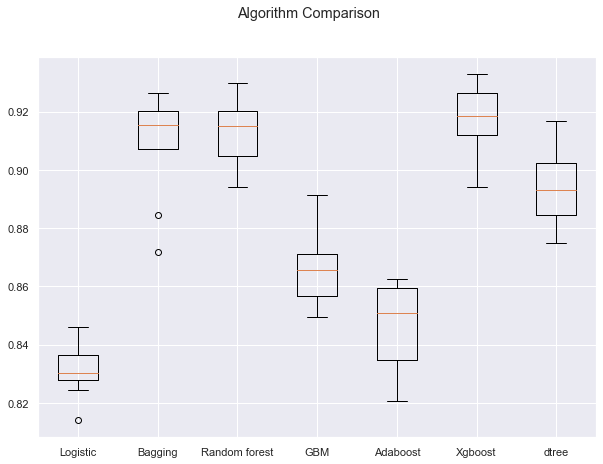

In [62]:
# Comparing the accuracy of various algorithms for specified dataset
algorithm_accuracy_comparison(X_train, y_train, X_val, y_val)

* XGBoost and Random Forest gives the highest cross-validation score.
* From the boxplot we can see that XGBoost and Random Forest does not give any outliers

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # Computing Accuracy
    acc = accuracy_score(target, pred)  
    # Computing Recall
    recall = recall_score(target, pred)  
    # Computing Precision
    precision = precision_score(target, pred)
    # Computing F1 score
    f1 = f1_score(target, pred)

    # creating a dataframe of metrics
    df_metrics = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_metrics

In [64]:
def confusion_matrix_func(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Spectral")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Building XGBoost model using GridSearchCV and RandomizedSearchCV

In [65]:
# Function to perform XGBoost using GridSearchCV or RandomizedSearchCV
def xgb_cv(X_train, y_train, cv_type):
    """
    To perform XGBoost using GridSearchCV or RandomizedSearchCV

    X_train: Features used for training model
    y_train: Independent variables used for training model
    cv_type: Type of CV to be performed
    """
    
    # defining model
    model = XGBClassifier(random_state=1,eval_metric='logloss')
    
    # Parameter grid to pass in GridSearchCV
    param_grid={'n_estimators':np.arange(50,150,50),
                'scale_pos_weight':[2,5,10],
                'learning_rate':[0.01,0.1,0.2,0.05],
                'gamma':[0,1,3,5],
                'subsample':[0.8,0.9,1],
                'max_depth':np.arange(1,5,1),
                'reg_lambda':[5,10]}
    
    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.accuracy_score)
    
    if cv_type == 'grid':
        #Calling GridSearchCV
        model_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)
    elif cv_type == 'rand':
        #Calling RandomizedSearchCV
        model_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)


    #Fitting parameters in GridSeachCV
    model_cv.fit(X_train,y_train)


    print("Best parameters are {} with CV score={}:" .format(model_cv.best_params_, model_cv.best_score_))
    return model_cv.best_params_

In [66]:
# Function to build XGBoost model
def xgb_model(X_train, y_train, best_params):
    
    """
    To build XGBoost model

    X_train: Features used for training model
    y_train: Independent variables used for training model
    best_params: Parameters to be used to tune the model
    """
    
    # building model with best parameters
    xgb_tuned = XGBClassifier(
        random_state=1,
        n_estimators=best_params.get('n_estimators'),
        scale_pos_weight=best_params.get('scale_pos_weight'),
        subsample=best_params.get('subsample'),
        learning_rate=best_params.get('learning_rate'),
        gamma=best_params.get('gamma'),
        eval_metric="logloss",
        reg_lambda=best_params.get('reg_lambda'),
        max_depth=best_params.get('max_depth')
    )

    # Fit the model on training data
    xgb_tuned.fit(X_train, y_train)
    
    return xgb_tuned

#### XGBoost model using GridSearchCV

In [67]:
%%time

# Obtaining the best parameters to build XGBoost model
best_params_grid = xgb_cv(X_train, y_train, 'grid')

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.9} with CV score=0.8924420512820512:
Wall time: 3min 38s


In [68]:
# Printing the parameters obtained
best_params_grid

{'gamma': 1,
 'learning_rate': 0.2,
 'max_depth': 4,
 'n_estimators': 100,
 'reg_lambda': 5,
 'scale_pos_weight': 2,
 'subsample': 0.9}

In [69]:
# Building XGBoost model based on obtained parameters
xgb_tunned_model_grid = xgb_model(X_train, y_train, best_params_grid)

In [70]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification(xgb_tunned_model_grid, X_train, y_train)

print("Training performance:")
xgboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.951024,0.858586,0.880829,0.869565


In [71]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification(xgb_tunned_model_grid, X_val, y_val)

print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.888604,0.649682,0.761194,0.701031


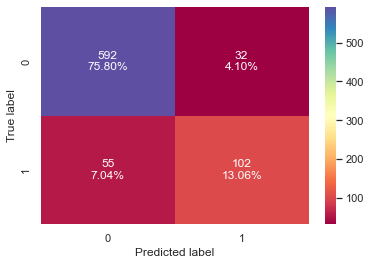

In [72]:
# creating confusion matrix
confusion_matrix_func(xgb_tunned_model_grid, X_val, y_val)

* The model is predicting that almost 75% of the customers will not buy the product and only 13% of customer will by the product.

#### XGBoost model using RandomizedSearchCV

In [73]:
%%time

# Obtaining the best parameters to build XGBoost model
best_params_rand = xgb_cv(X_train, y_train, 'rand')

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 1} with CV score=0.8837989743589745:
Wall time: 4.63 s


In [74]:
# Printing the parameters obtained
best_params_rand

{'subsample': 0.9,
 'scale_pos_weight': 2,
 'reg_lambda': 10,
 'n_estimators': 100,
 'max_depth': 4,
 'learning_rate': 0.2,
 'gamma': 1}

In [75]:
# Building XGBoost model based on obtained parameters
xgb_tunned_model_rand = xgb_model(X_train, y_train, best_params_rand)

In [76]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification(xgb_tunned_model_rand, X_train, y_train)

print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.944302,0.841751,0.862069,0.851789


In [77]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification(xgb_tunned_model_rand, X_val, y_val)

print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.880922,0.624204,0.742424,0.678201


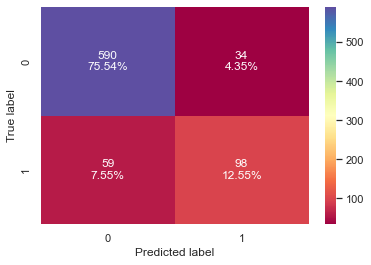

In [78]:
# creating confusion matrix
confusion_matrix_func(xgb_tunned_model_rand, X_val, y_val)

* Again, the model is predicting that almost 75% of the customers will not buy the product and only 12% of customer will by the product.
* In this model both false negative and false positive have also increased.

### Building Random Forest model using GridSearchCV and RandomizedSearchCV

In [79]:
# Function to perform Random Forest using GridSearchCV or RandomizedSearchCV
def rfc_cv(X_train, y_train, cv_type):
    """
    To perform RFC using GridSearchCV or RandomizedSearchCV

    X_train: Features used for training model
    y_train: Independent variables used for training model
    cv_type: Type of CV to be performed
    """
    
    #defining model
    model = RandomForestClassifier(random_state=1)
    
    # Parameter grid to pass in GridSearchCV
    param_grid={'n_estimators':np.arange(50,150,50),
                'criterion': ['gini', 'entropy'],
                'max_depth':np.arange(1,5,1),
                'min_samples_leaf': np.arange(1,10,1),
                'max_features': ['auto', 'sqrt', 'log2']}
    
    # Type of scoring used to compare parameter combinations
    scorer = metrics.make_scorer(metrics.accuracy_score)
    
    if cv_type == 'grid':
        #Calling GridSearchCV
        model_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)
    elif cv_type == 'rand':
        #Calling RandomizedSearchCV
        model_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)


    #Fitting parameters in GridSeachCV
    model_cv.fit(X_train,y_train)


    print("Best parameters are {} with CV score={}:" .format(model_cv.best_params_, model_cv.best_score_))
    return model_cv.best_params_

In [80]:
# Function to build RFC model
def rfc_model(X_train, y_train, best_params):
    
    """
    To build RFC model

    X_train: Features used for training model
    y_train: Independent variables used for training model
    best_params: Parameters to be used to tune the model
    """
    
    rfc_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators= best_params.get('n_estimators'),
    criterion= best_params.get('criterion'),
    min_samples_leaf= best_params.get('min_samples_leaf'),
    max_features= best_params.get('max_features'),
    max_depth= best_params.get('max_depth'),
    )

    # Fit the model on training data
    rfc_tuned.fit(X_train, y_train)
    
    return rfc_tuned

#### Random Forest model using GridSearchCV

In [81]:
%%time

# Obtaining the best parameters to build RFC model
best_params_grid = rfc_cv(X_train, y_train, 'grid')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters are {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 50} with CV score=0.8345061538461538:
Wall time: 30.1 s


In [82]:
# Building RFC model based on obtained parameters
rfc_tunned_model_grid = rfc_model(X_train, y_train, best_params_grid)

In [83]:
# Calculating different metrics on train set
rfc_grid_train = model_performance_classification(rfc_tunned_model_grid, X_train, y_train)

print("Training performance:")
rfc_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.838988,0.181818,0.864,0.300417


In [84]:
# Calculating different metrics on validation set
rfc_grid_val = model_performance_classification(rfc_tunned_model_grid, X_val, y_val)

print("Validation performance:")
rfc_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.822023,0.152866,0.8,0.256684


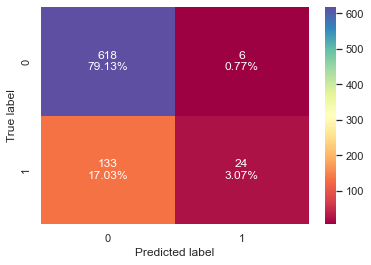

In [85]:
# creating confusion matrix
confusion_matrix_func(rfc_tunned_model_grid, X_val, y_val)

* This model is predicting that almost 79% of the customers will not buy the product and only 3% of customer will by the product.
* This is not we are expecting. The model is performing bad when it come to predicting the True Positives.

#### Random Forest model using RandomizedSearchCV

In [86]:
%%time

# Obtaining the best parameters to build RFC model
best_params_rand = rfc_cv(X_train, y_train, 'rand')

Best parameters are {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini'} with CV score=0.8341866666666666:
Wall time: 3.75 s


In [87]:
# Building RFC model based on obtained parameters
rfc_tunned_model_rand = rfc_model(X_train, y_train, best_params_rand)

In [88]:
# Calculating different metrics on train set
rfc_rand_train = model_performance_classification(
    rfc_tunned_model_rand, X_train, y_train
)
print("Training performance:")
rfc_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.838988,0.175084,0.888889,0.292546


In [89]:
# Calculating different metrics on validation set
rfc_rand_val = model_performance_classification(rfc_tunned_model_rand, X_val, y_val)
print("Validation performance:")
rfc_rand_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.824584,0.165605,0.8125,0.275132


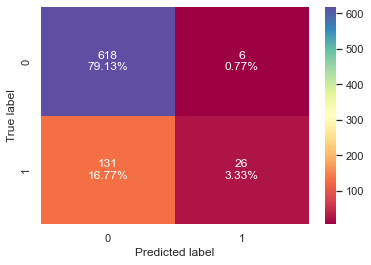

In [90]:
# creating confusion matrix
confusion_matrix_func(rfc_tunned_model_rand, X_val, y_val)

* The model is predicting that almost 79% of the customers will not buy the product and only 3% of customer will by the product which is not acceptable.
* We are focusing on increasing the True positives which in this case is very low.

### Sampling of dataset
Our data is highly imbalanced, thus, we need to perform sampling techniques on the dataset to balance the dataset.

#### Sampling techniques:
1. Random Oversampling: In this, duplicate records are randomly added in the minority class.
2. Random Undersampling: In this, records are randomly removed from the majority class.

**Sampling technique applied on the dataset:**
* Our dataset has on 18% of customers who have taken the product in the past year, thus under sampling would be a great choice.
* In case we apply over sampling there are high chances that there might be records that would not add any value to the model. 

In [91]:
# Initialising undersample model
undersample = NearMiss(version=1,n_neighbors=3)

# Fiting the data
X_samp, y_samp = undersample.fit_resample(X,Y)

In [92]:
# Viewing the number of records in the dataset
y_samp.value_counts()

0    920
1    920
Name: ProdTaken, dtype: int64

#### Spliting the dataset into train, validation and test set

In [93]:
# Splitting into temp and test sets.
X_temp, X_test, y_temp, y_test = train_test_split(X_samp, y_samp, random_state=1, test_size=0.2)

# Splitting into train and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, random_state=1, test_size=0.2)


Cross-Validation Performance:

Logistic: 67.97262059973924
Bagging: 85.55410691003912
Random forest: 88.35651166159641
GBM: 82.58076198754163
Adaboost: 79.7732869766768
Xgboost: 87.25771403737505
dtree: 82.15413588294945

Validation Performance:

Logistic: 0.6305084745762712
Bagging: 0.8813559322033898
Random forest: 0.911864406779661
GBM: 0.8
Adaboost: 0.7796610169491526
Xgboost: 0.9084745762711864
dtree: 0.864406779661017


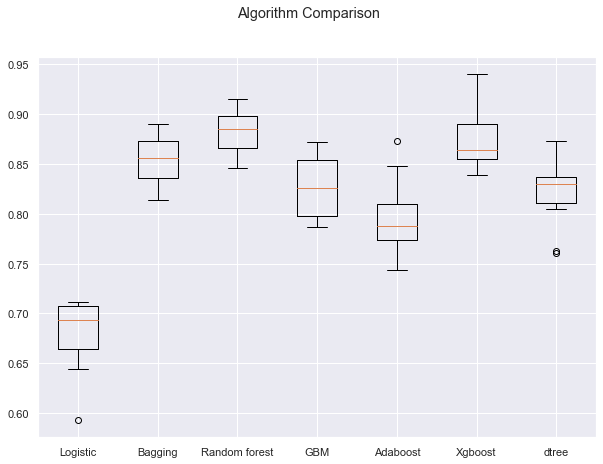

In [94]:
# Comparing the accuracy of various algorithms for specified dataset
algorithm_accuracy_comparison(X_train,y_train, X_val, y_val)

* Xgboost and Random forest have high cross-validation performance.
* Both these models do not have any outliers in the boxplot.

#### XGBoost model using GridSearchCV

In [95]:
%%time

# Obtaining the best parameters to build XGBoost model
best_params_grid_samp = xgb_cv(X_train, y_train, 'grid')

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 2, 'subsample': 0.8} with CV score=0.8394410385863684:
Wall time: 2min 13s


In [96]:
# Building XGBoost model based on obtained parameters
xgb_tunned_model_grid_samp = xgb_model(X_train, y_train, best_params_grid_samp)

In [97]:
# Calculating different metrics on train set
xgboost_samp_grid_train = model_performance_classification(
    xgb_tunned_model_grid_samp, X_train, y_train
)
print("Training performance:")
xgboost_samp_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.967715,0.984772,0.952537,0.968386


In [98]:
# Calculating different metrics on validation set
xgboost_samp_grid_val = model_performance_classification(xgb_tunned_model_grid_samp, X_val, y_val)
print("Validation performance:")
xgboost_samp_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.833898,0.884354,0.802469,0.841424


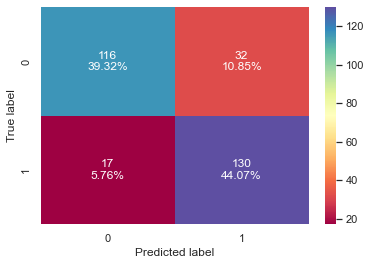

In [99]:
# creating confusion matrix
confusion_matrix_func(xgb_tunned_model_grid_samp, X_val, y_val)

* In this, the model is predicting that 44% of customers would buy the newly added package and only 39% of customers woul not by the package.
* The recall score for both train data and validation data are 98% and 88% respectively.

#### XGBoost model using RandomizedSearchCV

In [100]:
%%time

# Obtaining the best parameters to build XGBoost model
best_params_rand_samp = xgb_cv(X_train, y_train, 'rand')

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'reg_lambda': 10, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 1} with CV score=0.8292463036422648:
Wall time: 3.3 s


In [101]:
# Building XGBoost model based on obtained parameters
xgb_tunned_model_rand_samp = xgb_model(X_train, y_train, best_params_rand_samp)

In [102]:
# Calculating different metrics on train set
xgboost_samp_random_train = model_performance_classification(
    xgb_tunned_model_rand_samp, X_train, y_train
)
print("Training performance:")
xgboost_samp_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.938828,0.976311,0.908661,0.941272


In [103]:
# Calculating different metrics on validation set
xgboost_samp_random_val = model_performance_classification(xgb_tunned_model_rand_samp, X_val, y_val)
print("Validation performance:")
xgboost_samp_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.833898,0.863946,0.814103,0.838284


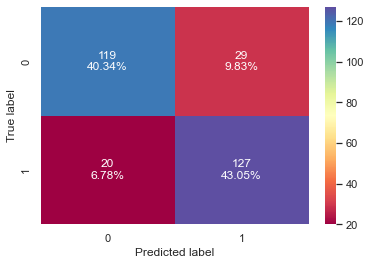

In [104]:
# creating confusion matrix
confusion_matrix_func(xgb_tunned_model_rand_samp, X_val, y_val)

* In this, the model is predicting that 43% of customers would buy the newly added package and only 40% of customers would not by the package which compared to previous model is not good.

#### Random Forest model using GridSearchCV

In [105]:
%%time 

# Obtaining the best parameters to build RFC model
best_params_grid_samp = rfc_cv(X_train, y_train, 'grid')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters are {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 7, 'n_estimators': 50} with CV score=0.7918608005769924:
Wall time: 23.7 s


In [106]:
# Building RFC model based on obtained parameters
rfc_tunned_model_grid_samp = rfc_model(X_train, y_train, best_params_grid_samp)

In [107]:
# Calculating different metrics on train set
rfc_samp_grid_train = model_performance_classification(
    rfc_tunned_model_grid_samp, X_train, y_train
)
print("Training performance:")
rfc_samp_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805438,0.766497,0.832721,0.798238


In [108]:
# Calculating different metrics on validation set
rfc_samp_grid_val = model_performance_classification(rfc_tunned_model_grid_samp, X_val, y_val)
print("Validation performance:")
rfc_samp_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.766102,0.693878,0.809524,0.747253


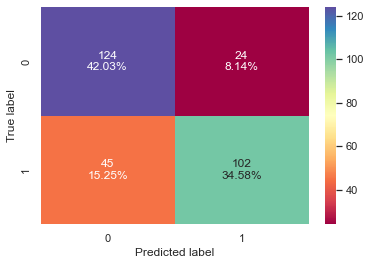

In [109]:
# creating confusion matrix
confusion_matrix_func(rfc_tunned_model_grid_samp, X_val, y_val)

* The model here predicts that almost 42% of the customers won't buy the product and only 34% of the customers would buy it which is not what we were expecting.

#### Randon Forest model using RandomizedSearchCV

In [110]:
%%time 

# Obtaining the best parameters to build RFC model
best_params_rand_samp = rfc_cv(X_train, y_train, 'rand')

Best parameters are {'n_estimators': 50, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'gini'} with CV score=0.7884745762711864:
Wall time: 2.95 s


In [111]:
# Building RFC model based on obtained parameters
rfc_tunned_model_rand_samp = rfc_model(X_train, y_train, best_params_rand_samp)

In [112]:
# Calculating different metrics on train set
rfc_samp_rand_train = model_performance_classification(
    rfc_tunned_model_rand_samp, X_train, y_train
)
print("Training performance:")
rfc_samp_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805438,0.76819,0.831502,0.798593


In [113]:
# Calculating different metrics on validation set
rfc_samp_rand_val = model_performance_classification(rfc_tunned_model_rand_samp, X_val, y_val)
print("Validation performance:")
rfc_samp_rand_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.766102,0.687075,0.814516,0.745387


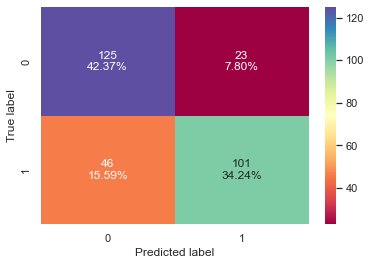

In [114]:
# creating confusion matrix
confusion_matrix_func(rfc_tunned_model_rand_samp, X_val, y_val)

* The predictions of this model is also similar to the previous model. Almost 42% of the customers are not buying the product and only 34% of the customers are buying it which is not what we were expecting.

### Comparing all the models created

In [115]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgboost_grid_train.T,
        xgboost_random_train.T,
        rfc_grid_train.T,
        rfc_rand_train.T,
        xgboost_samp_grid_train.T,
        xgboost_samp_random_train.T,
        rfc_samp_grid_train.T,
        rfc_samp_rand_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random search",
    "RFC Tuned with Grid search",
    "RFC Tuned with Random Search",
    "XGboost after sampling Tuned with Grid search",
    "XGboost after sampling Tuned with Random Search",
    "RFC after sampling Tuned with Grid search",
    "RFC after sampling Tuned with Random search"

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Xgboost Tuned with Grid search,Xgboost Tuned with Random search,RFC Tuned with Grid search,RFC Tuned with Random Search,XGboost after sampling Tuned with Grid search,XGboost after sampling Tuned with Random Search,RFC after sampling Tuned with Grid search,RFC after sampling Tuned with Random search
Accuracy,0.951024,0.944302,0.838988,0.838988,0.967715,0.938828,0.805438,0.805438
Recall,0.858586,0.841751,0.181818,0.175084,0.984772,0.976311,0.766497,0.768190
Precision,0.880829,0.862069,0.864000,0.888889,0.952537,0.908661,0.832721,0.831502
F1,0.869565,0.851789,0.300417,0.292546,0.968386,0.941272,0.798238,0.798593


**Observations for train dataset:**
* We can see that the XGBoost model that was tunned using GridSearchCV after resampling has the highest accuracy of 96% as compared to other models.
* In our case, the company wants to increase the number of buyers thus the Recall needs to be maximized, greater the Recall lesser the chances of false negatives.
* If we look at the recall score of the models again the XGBoost model that was tunned using GridSearchCV after resampling has the highest score.
* Thus, we can say that this model has performed its best for the train dataset.

In [116]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        xgboost_grid_val.T,
        xgboost_random_val.T,
        rfc_grid_val.T,
        rfc_rand_val.T,
        xgboost_samp_grid_val.T,
        xgboost_samp_random_val.T,
        rfc_samp_grid_val.T,
        rfc_samp_rand_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Xgboost Tuned with Grid search",
    "Xgboost Tuned with Random search",
    "RFC Tuned with Grid search",
    "RFC Tuned with Random Search",
    "XGboost after sampling Tuned with Grid search",
    "XGboost after sampling Tuned with Random Search",
    "RFC after sampling Tuned with Grid search",
    "RFC after sampling Tuned with Random search"

]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Xgboost Tuned with Grid search,Xgboost Tuned with Random search,RFC Tuned with Grid search,RFC Tuned with Random Search,XGboost after sampling Tuned with Grid search,XGboost after sampling Tuned with Random Search,RFC after sampling Tuned with Grid search,RFC after sampling Tuned with Random search
Accuracy,0.888604,0.880922,0.822023,0.824584,0.833898,0.833898,0.766102,0.766102
Recall,0.649682,0.624204,0.152866,0.165605,0.884354,0.863946,0.693878,0.687075
Precision,0.761194,0.742424,0.800000,0.812500,0.802469,0.814103,0.809524,0.814516
F1,0.701031,0.678201,0.256684,0.275132,0.841424,0.838284,0.747253,0.745387


**Observations for Validation dataset:**
* For validation dataset we can see that the XGBoost model that was tunned using GridSearchCV before resampling has the highest accuracy of 88% as compared to other models.
* As our company's main focus is to increase the number of buyers, we concentrate on the recall score of the models.
* Among all our models, the best recall score was obtained by the XGBoost model that was tunned using GridSearchCV on resampled data.

**Selecting the model for predicting values of the test data:**
* Since in both the above cases the recall score of the XGBoost model that was tunned using GridSearchCV after resampling was good we use this model to predict the values of test data

In [117]:
# Classification report for test data
xgb_grid_test = model_performance_classification(xgb_tunned_model_grid_samp, X_test, y_test)
print("Test Performance:")
xgb_grid_test

Test Performance:


,Accuracy,Recall,Precision,F1
0,0.831522,0.928571,0.775229,0.845


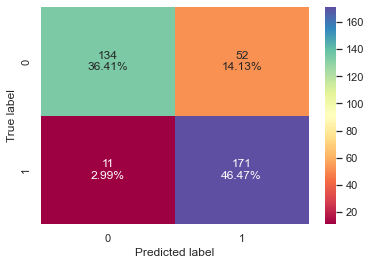

In [118]:
confusion_matrix_func(xgb_tunned_model_rand_samp, X_test, y_test)

**Observations:**
* The model has predicted that 46% of the customers will be buying the newly introduced Wellness Tourism package.
* The rate of false negative for the test set is 14% and the false positive is 3%.

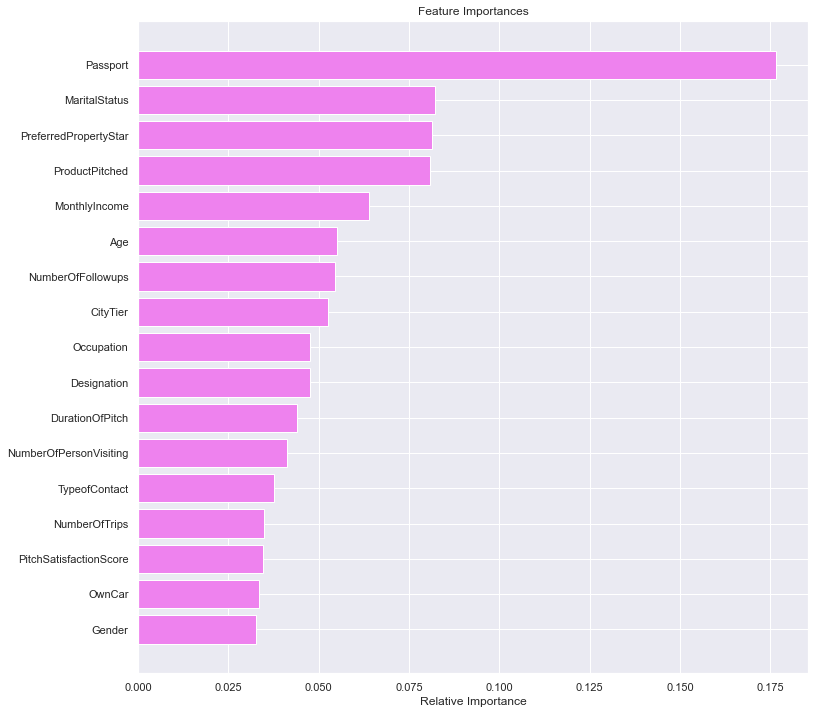

In [119]:
# Displaying the important features selected by the model
cols = ["ProdTaken","NumberOfChildrenVisiting"]
feature_names = data_1.drop(columns=cols, axis=1).columns
importances = xgb_tunned_model_grid_samp.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* We can see that the model has listed the important features and Passport has got the highest importance followed by Marital Status, PreferredPropertyStar, ProductPitched and MonthlyIncome.
* This means that for the model to predict properly it requires these feature values to be accurate.

### Recommendations:
* The company can observe that customers holding a passport have higher probability of purchasing the Wellness Tourism package.
* In addition, the target audience for this product pitch would be between the ages of 28 and 42.
* It appears that consumers with an average salary of  18,000 to 23,000 are interested in purchasing this package.
* The company should place a greater emphasis on influencing and enticing a younger audience, since they are more health-conscious and would prefer to participate in trips that encourage them to begin living a healthier lifestyle.
* The company should also consider the customer's standard of living. People who live in the third tier have a greater desire to travel and would like to purchase the package.
* The company can recommend special deals to customers travelling in groups or as couples to increase their chance of of making a purchase.
* The length of the pitch should also be addressed, since a better pitch can assist the marketing team in better advertising their product and assisting the customer in better understanding the package.

**Resources**
* Normalize / Standardize / Rescale Your Data?: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=It%20is%20required%20only%20when,1%2C000%20times%20larger%20than%20age.
<br><br>
* Understanding evaluation metrics: https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226